
Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
df = pd.read_csv('/content/energydata_complete.csv')
# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
from datetime import datetime

# Your datetime string
date_str = '2016-01-11 17:00:00'

# Specify the format
format_str = '%Y-%m-%d %H:%M:%S'  # The format

# Convert to datetime
date_time_obj = datetime.strptime(date_str, format_str)

# Output the datetime object and its type
print(date_time_obj)
print(type(date_time_obj))

2016-01-11 17:00:00
<class 'datetime.datetime'>


In [6]:
# Convert 'date' column to datetime dtype
df['date'] = pd.to_datetime(df['date'])

# Check the conversion result
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
# Extract year, month, and day into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

# Display the DataFrame to see the new columns
print(df.head())

                 date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...    92.0   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...    92.0   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...    92.0   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2  year  m

In [8]:
df.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,2016.0,3.101647,16.057411,11.502002
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,2016.0,1.000000,1.000000,0.000000
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2016.0,2.000000,9.000000,6.000000
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,2016.0,3.000000,16.000000,12.000000
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,2016.0,4.000000,23.000000,17.000000
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,2016.0,5.000000,31.000000,23.000000
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,0.0,1.339200,8.450998,6.921953


In [9]:
df.shape

(19735, 33)

In [10]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016,5,27,17
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016,5,27,17
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016,5,27,17
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016,5,27,17
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,2016,5,27,18


In [11]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge

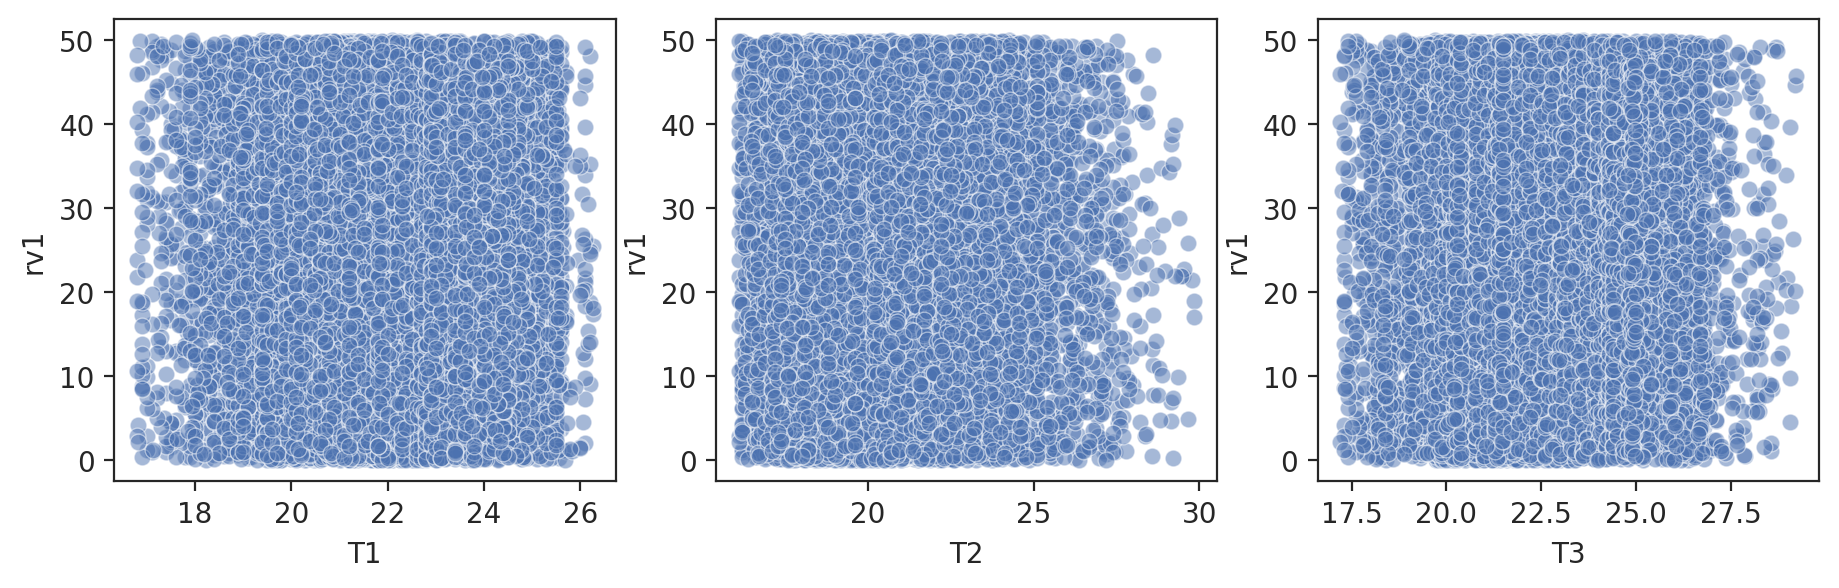

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.scatterplot(data=df, x='T1', y='rv1', alpha=0.5, ax=axs[0])
sns.scatterplot(data=df, x='T2', y='rv1', alpha=0.5, ax=axs[1])
sns.scatterplot(data=df, x='T3', y='rv1', alpha=0.5, ax=axs[2]);

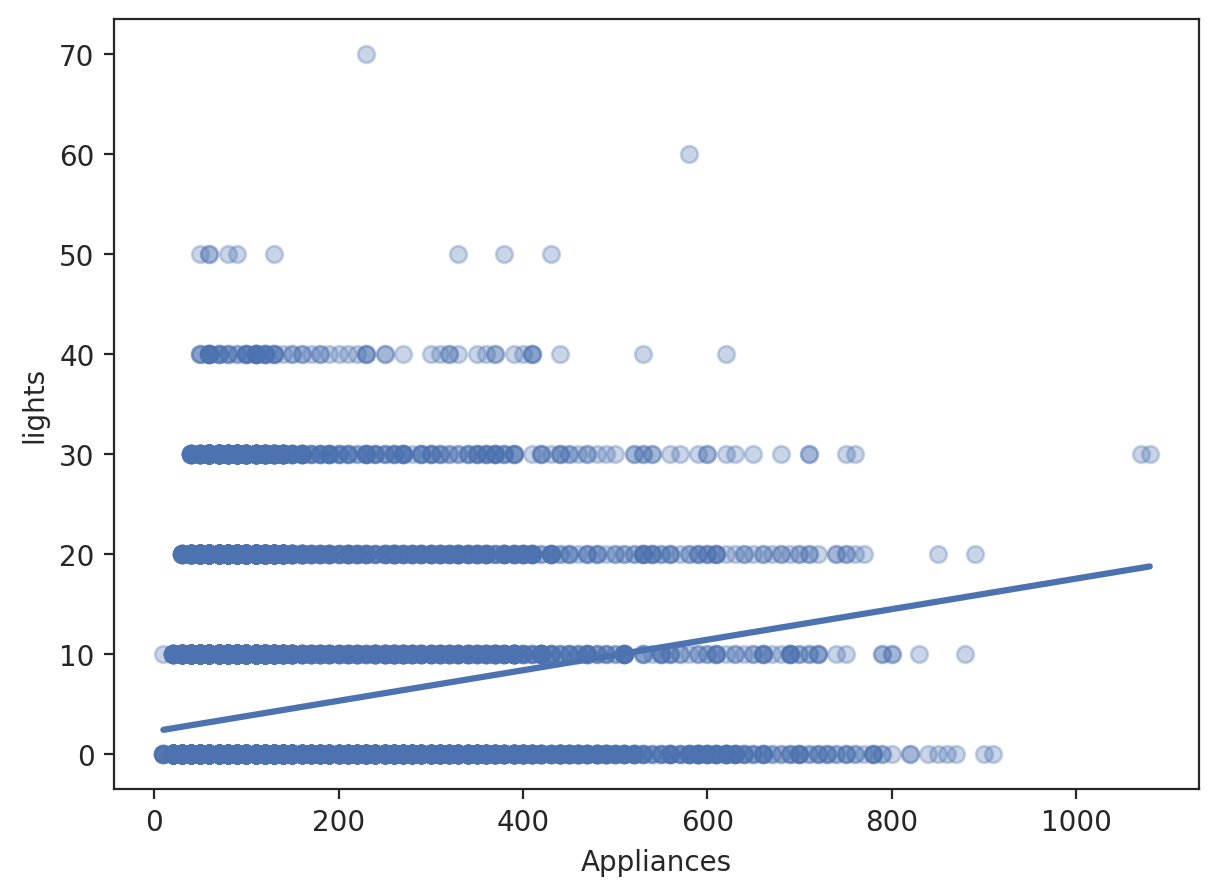

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=df, x='Appliances', y='lights',
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

In [14]:
light = df.query("lights == '10:'")

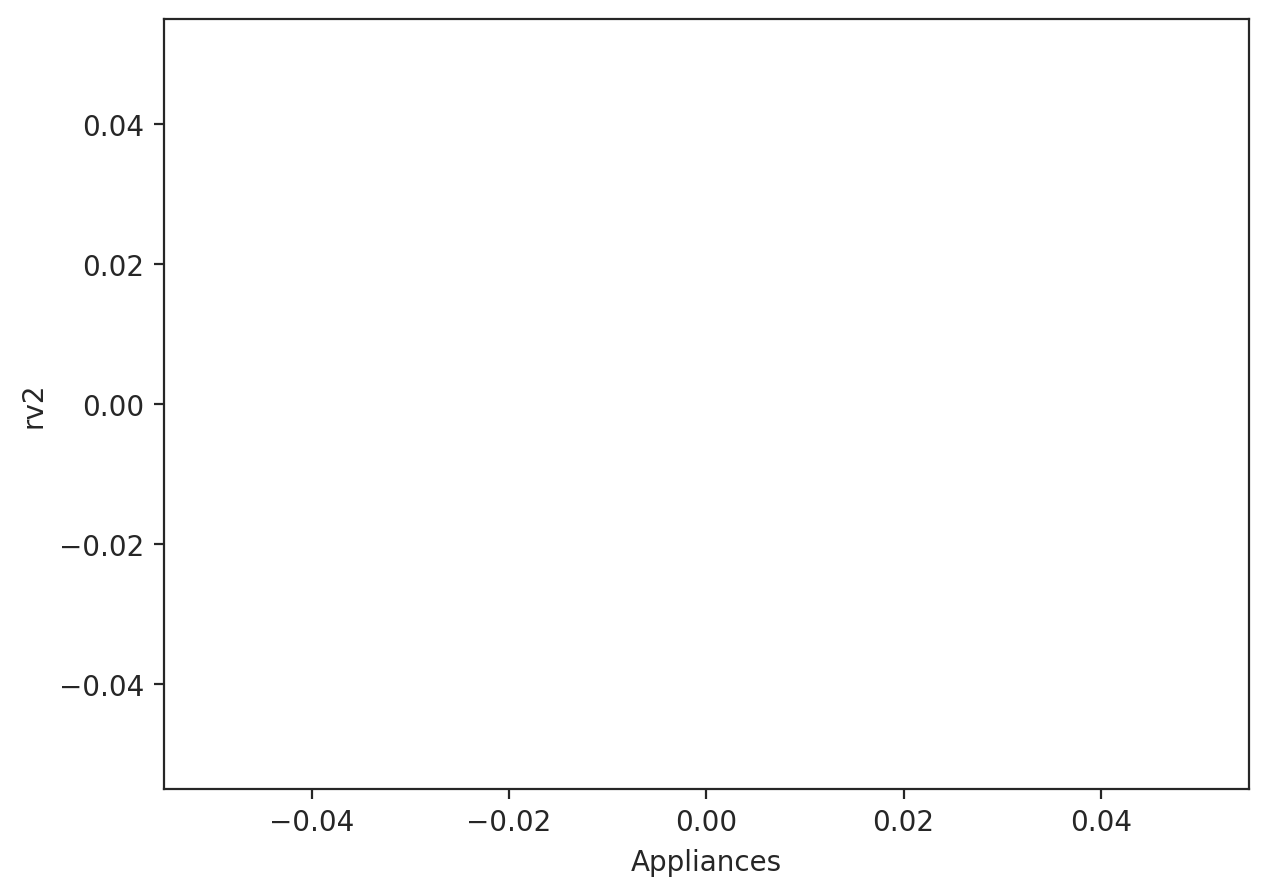

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=light, x='Appliances', y='rv2',
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['T2']], df['T6'], test_size=0.3, random_state=0)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")

RMSE: 3.610


In [26]:
# drop
df = df.drop(['date', 'lights'], axis=1)

In [27]:
X = df.drop('Appliances', axis=1)
y = df['Appliances']

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict on the training set
y_train_pred = model.predict(X_train)

In [32]:
# Calculate MAE on the training set
mae = mean_absolute_error(y_train, y_train_pred)
print(f'Mean Absolute Error: {mae:.3f}')

Mean Absolute Error: 53.644


In [33]:
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.3f}')

Root Mean Squared Error: 94.849


In [34]:
y_test_pred = model.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Squared Error: {rmse:.3f}')

Root Mean Squared Error: 93.422


In [36]:
ridge_model = Ridge()

In [37]:
ridge_model.fit(X_train, y_train)

Ridge()

In [38]:

y_test_pred = ridge_model.predict(X_test)

In [39]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Root Mean Squared Error on Test Set: {rmse:.3f}')

Root Mean Squared Error on Test Set: 93.483


In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso_model = Lasso()

In [42]:
lasso_model.fit(X_train, y_train)

Lasso()

In [43]:
coefficients = lasso_model.coef_

In [44]:
non_zero_coefficients = np.sum(coefficients != 0)
print(f'Number of non-zero feature weights: {non_zero_coefficients}')

Number of non-zero feature weights: 4


In [45]:
y_pred = lasso_model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)

In [47]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse:.3f}')

Root Mean Squared Error (RMSE) on the test set: 98.585
